## Aula ANOVA e  Regressão Linear

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(12)

races =   ["asian","black","hispanic","other","white"]

# Generate random data
voter_race = np.random.choice(a= races,
                              p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              size=1000)

voter_age = stats.poisson.rvs(loc=18,
                              mu=30,
                              size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race":voter_race,"age":voter_age})
groups = voter_frame.groupby("race").groups

# Etract individual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

In [10]:
voter_frame.head(10)

,race,age
0,black,51
1,white,49
2,hispanic,51
3,white,48
4,asian,56
5,white,40
6,white,51
7,asian,52
8,white,39
9,black,57


In [9]:
voter_frame.describe()

,age
count,1000.000000
mean,47.773000
std,5.308074
min,34.000000
25%,44.000000
50%,48.000000
75%,51.000000
max,66.000000


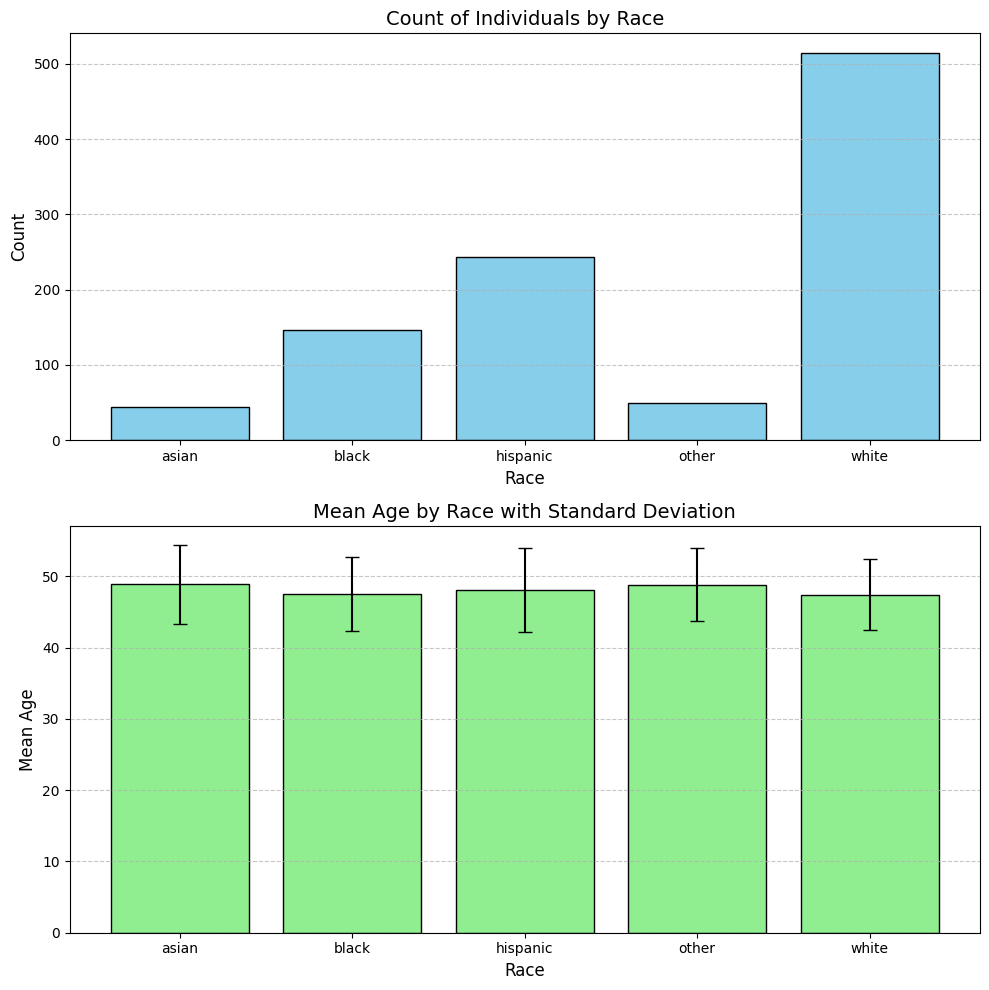

In [4]:
group_stats = voter_frame.groupby("race").age.agg(["count", "mean", "std"]).reset_index()

# Estatística para visualização
categories = group_stats["race"]
counts = group_stats["count"]
means = group_stats["mean"]
std_devs = group_stats["std"]

# Subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Gráfico de coluna por contagem por raça
axs[0].bar(categories, counts, color='skyblue', edgecolor='black')
axs[0].set_title('Count of Individuals by Race', fontsize=14)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].set_xlabel('Race', fontsize=12)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico édia de Idade com desvio padrão
axs[1].bar(categories, means, yerr=std_devs, capsize=5, color='lightgreen', edgecolor='black')
axs[1].set_title('Mean Age by Race with Standard Deviation', fontsize=14)
axs[1].set_ylabel('Mean Age', fontsize=12)
axs[1].set_xlabel('Race', fontsize=12)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

In [11]:
# ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

## Conclusão

Os resultados do teste (estatística F = 1,774, valor-p = 0,1317) indicam que não podemos rejeitar a hipótese nula ao nível de significância comumente utilizado (por exemplo, α = 0,05). Isso significa que não há diferença estatisticamente significativa entre as médias dos grupos.

### Interpretação

- **Estatística F**: Mede a razão entre a variância das médias dos grupos e a variância dentro dos grupos. Quanto maior a estatística F, maior a diferença entre as médias dos grupos.
- **Valor-p**: Representa a probabilidade de observar um resultado tão extremo quanto o obtido (ou mais extremo), assumindo que a hipótese nula (as médias dos grupos são iguais) é verdadeira.

Como o valor-p (0,1317) é maior que 0,05:
- **Conclusão**: Não há evidências suficientes para concluir que as médias das idades diferem significativamente entre os grupos raciais.

### Recomendações para análises futuras

1. **Comparações par a par**: Verifique se há diferenças específicas entre grupos utilizando métodos como o teste HSD de Tukey ou correções de Bonferroni.
2. **Análise exploratória dos dados**: Investigue outras métricas ou visualizações para compreender melhor as características dos grupos.
3. **Análise de poder**: Avalie se o tamanho da amostra é suficiente para detectar um efeito significativo.


# Regressão Linear Simples e Múltipla

A regressão linear é uma técnica estatística fundamental utilizada para modelar a relação entre uma variável dependente (aquela que queremos prever) e uma ou mais variáveis independentes (aquelas que influenciam a variável dependente).

Imagine que queremos prever o preço de um imóvel com base em sua área. A área seria a variável independente (X) e o preço, a variável dependente (Y).

## Regressão Linear Simples
### Uma variável independente

### Equação

Y = a + bX

- **Y**: Valor previsto (preço do imóvel)
- **a**: Intercepto (valor de Y quando X é zero)
- **b**: Coeficiente angular (inclinação da reta)

### Interpretação
O coeficiente "b" indica como o valor de Y varia em média quando X aumenta uma unidade. Por exemplo, se **b = 1000**, significa que a cada metro quadrado adicional, o preço do imóvel aumenta em média R$1000.

## Regressão Linear Múltipla
### Múltiplas variáveis independentes
Aqui, utilizamos várias variáveis para fazer a previsão.

### Equação

Y = a + b1X1 + b2X2 + ... + bnXn

- **Y**: Valor previsto
- **X1, X2, ..., Xn**: Variáveis independentes (área, número de quartos, idade do imóvel, etc.)
- **a, b1, b2, ..., bn**: Coeficientes

### Interpretação
Cada coeficiente "bi" indica como o valor de Y varia em média quando **Xi** aumenta uma unidade, mantendo as outras variáveis constantes.

In [15]:
data = {
    "AnosExperiencia": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "ProjetosConcluidos": [1, 2, 2, 3, 4, 5, 5, 6, 7, 8],
    "Salario": [30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
}
df = pd.DataFrame(data)
print("\nDados fictícios:\n", df.head(5) )


Dados fictícios:
    AnosExperiencia  ProjetosConcluidos  Salario
0                1                   1       30
1                2                   2       35
2                3                   2       40
3                4                   3       45
4                5                   4       50


In [14]:
df.head(10)

,AnosExperiencia,ProjetosConcluidos,Salario
0,1,1,30
1,2,2,35
2,3,2,40
3,4,3,45
4,5,4,50
5,6,5,55
6,7,5,60
7,8,6,65
8,9,7,70
9,10,8,75


In [18]:
# Dividindo os dados para treinamento e teste
X_simple = df[["AnosExperiencia"]]
y = df["Salario"]
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)

In [19]:
# Criando e treinando o modelo
model_simple = LinearRegression()
model_simple.fit(X_train, y_train)

LinearRegression()

In [20]:
# Fazendo previsões
y_pred = model_simple.predict(X_test)

In [21]:
# Avaliando o modelo
mse_simple = mean_squared_error(y_test, y_pred)
r2_simple = r2_score(y_test, y_pred)

print("\nRegressão Linear Simples")
print("Coeficiente Angular (w1):", model_simple.coef_[0])
print("Intercepto (w0):", model_simple.intercept_)
print("Erro Quadrático Médio (MSE):", mse_simple)
print("Coeficiente de Determinação (R^2):", r2_simple)


Regressão Linear Simples
Coeficiente Angular (w1): 5.000000000000001
Intercepto (w0): 24.999999999999996
Erro Quadrático Médio (MSE): 0.0
Coeficiente de Determinação (R^2): 1.0


In [23]:
### Regressão Linear Múltipla
# Dividindo os dados para treinamento e teste
X_multiple = df[["AnosExperiencia", "ProjetosConcluidos"]]
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

In [24]:
# Criando e treinando o modelo
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)

LinearRegression()

In [25]:
# Fazendo previsões
y_pred = model_multiple.predict(X_test)

In [26]:
# Avaliando o modelo
mse_multiple = mean_squared_error(y_test, y_pred)
r2_multiple = r2_score(y_test, y_pred)

print("\nRegressão Linear Múltipla")
print("Coeficientes:", model_multiple.coef_)
print("Intercepto (w0):", model_multiple.intercept_)
print("Erro Quadrático Médio (MSE):", mse_multiple)
print("Coeficiente de Determinação (R^2):", r2_multiple)


Regressão Linear Múltipla
Coeficientes: [5.00000000e+00 1.46983757e-16]
Intercepto (w0): 24.999999999999996
Erro Quadrático Médio (MSE): 0.0
Coeficiente de Determinação (R^2): 1.0


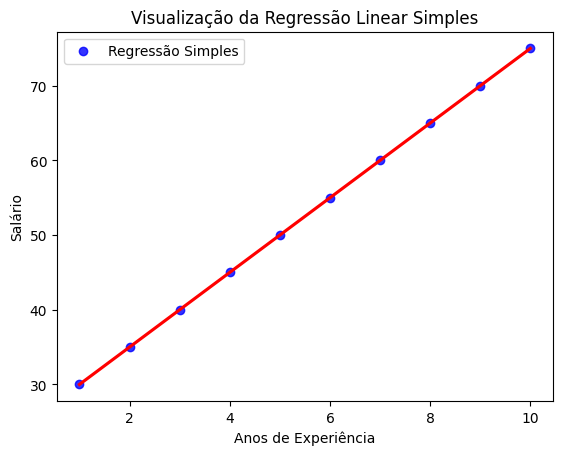

In [30]:
# Visualizando os resultados
sns.regplot(
    x=df["AnosExperiencia"],
    y=df["Salario"],
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
    label="Regressão Simples"
)
plt.title("Visualização da Regressão Linear Simples")
plt.xlabel("Anos de Experiência")
plt.ylabel("Salário")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


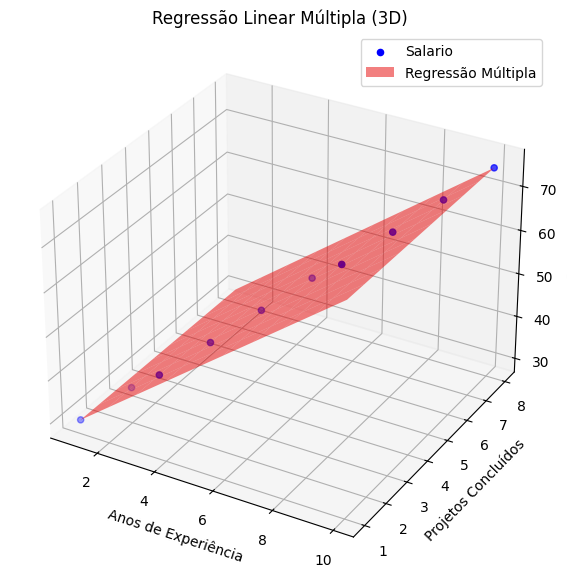

In [29]:
# Visualizando os resultados em 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["AnosExperiencia"], df["ProjetosConcluidos"], df["Salario"], color='blue', label='Salario')

# Criando uma superfície para visualização
def predict_surface(model, X, feature1, feature2):
    x = np.linspace(X[feature1].min(), X[feature1].max(), 10)
    y = np.linspace(X[feature2].min(), X[feature2].max(), 10)
    xx, yy = np.meshgrid(x, y)
    zz = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    return xx, yy, zz

xx, yy, zz = predict_surface(model_multiple, df, "AnosExperiencia", "ProjetosConcluidos")
ax.plot_surface(xx, yy, zz, color='red', alpha=0.5, label='Regressão Múltipla')

ax.set_xlabel("Anos de Experiência")
ax.set_ylabel("Projetos Concluídos")
ax.set_zlabel("Salário")
plt.title("Regressão Linear Múltipla (3D)")
plt.legend()
plt.show()